In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace 'your_dataset.csv' with your actual dataset)
train_data = pd.read_csv("training_Preprocessed.csv")

# Drop the patient_id column
train_data.drop(columns=['patient_id'], inplace=True)

# Separate features (X) and target variable (y)
X = train_data.drop(columns=["DiagPeriodL90D"])
y = train_data["DiagPeriodL90D"]

# Handle missing values
numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Impute missing values for numerical features
numerical_imputer = SimpleImputer(strategy='mean')
X[numerical_features] = numerical_imputer.fit_transform(X[numerical_features])

# Impute missing values for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_features)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get the names of features
feature_names = X_train.columns

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 106))  # Adjust figure size as needed
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importances')
plt.show()

In [ ]:
# prompt: list the columns of dataset

print(X_train.columns.to_list())


['patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_degree', 'labor_force_participation', 'unemploym

In [ ]:
# Assuming 'train_data' is your DataFrame
null_values = train_data.isnull().sum()
print("Null values in each column:")
print(null_values)


Null values in each column:
patient_race           6385
payer_type             1803
patient_state            51
patient_zip3              0
patient_age               0
                       ... 
merged_bmi                0
processed_text            1
affected_site             1
patient_race_filled       0
patient_income            0
Length: 88, dtype: int64


LASSO Regression:

L1 regularization (LASSO) can be used to encourage sparsity in feature weights, effectively performing feature selection.


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your data (replace 'your_dataset.csv' with your actual dataset)
train_data = pd.read_csv("cleaned_dataset_encoded.csv")

# Drop the patient_id column
train_data = train_data.drop(['patient_id'], axis=1)

# Handle missing values
# Separate numerical and categorical features
numerical_features = train_data.select_dtypes(include=['float64']).columns
categorical_features = train_data.select_dtypes(include=['object']).columns

# Impute missing values for numerical features
numerical_imputer = SimpleImputer(strategy='mean')
train_data[numerical_features] = numerical_imputer.fit_transform(train_data[numerical_features])

# Impute missing values for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_features] = categorical_imputer.fit_transform(train_data[categorical_features])

# One-hot encode categorical variables
train_data = pd.get_dummies(train_data, columns=categorical_features)

# Split the data into features (X) and target variable (y)
X = train_data.drop(columns=["DiagPeriodL90D"])
y = train_data["DiagPeriodL90D"]

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Create the Lasso model
lasso = Lasso(alpha=0.04)  # Adjust the alpha parameter based on the desired level of regularization

# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)

# Get the coefficients of the features
feature_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Get the names of non-zero coefficient features (selected features)
selected_feature_names = feature_coefficients[feature_coefficients != 0].index

# Print the names of selected features
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['breast_cancer_diagnosis_code_1741',
       'breast_cancer_diagnosis_code_1742',
       'breast_cancer_diagnosis_code_1744',
       'breast_cancer_diagnosis_code_1745',
       'breast_cancer_diagnosis_code_1748',
       'breast_cancer_diagnosis_code_1749',
       'breast_cancer_diagnosis_desc_Malignant neoplasm of breast (female), unspecified',
       'breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of female breast',
       'breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of female breast',
       'breast_cancer_diagnosis_desc_Malignant neoplasm of other specified sites of female breast',
       'breast_cancer_diagnosis_desc_Malignant neoplasm of upper-inner quadrant of female breast',
       'breast_cancer_diagnosis_desc_Malignant neoplasm of upper-outer quadrant of female breast',
       'processed_text_malignant neoplasm breast female unspecified',
       'processed_text_malignant neoplasm central portion female b

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your data (replace 'your_dataset.csv' with your actual dataset)
train_data = pd.read_csv("final_rounded.csv")
# train_data_rounded = train_data.round(2)

# Split the data into features (X) and target variable (y)
X = train_data.drop(columns=["DiagPeriodL90D"])
y = train_data["DiagPeriodL90D"]

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base classifier (you can use any other classifier of your choice)
base_classifier = RandomForestClassifier()

# Create the RFE model and select 10 features
n_features_to_select = 10
rfe = RFE(estimator=base_classifier, n_features_to_select=n_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Get the names of the selected features
selected_feature_names = X_train.columns[rfe.support_]

# Create a DataFrame with selected features
selected_features_df = pd.DataFrame(X_train_rfe, columns=selected_feature_names)

# Print the names of selected features
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['Unnamed: 0', 'patient_id', 'patient_age', 'widowed',
       'labor_force_participation', 'unemployment_rate', 'commute_time',
       'merged_bmi', 'affected_site_frequency_encoded',
       'breast_cancer_diagnosis_code_encoded'],
      dtype='object')


<ipython-input-34-a6bd3aa12be2>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


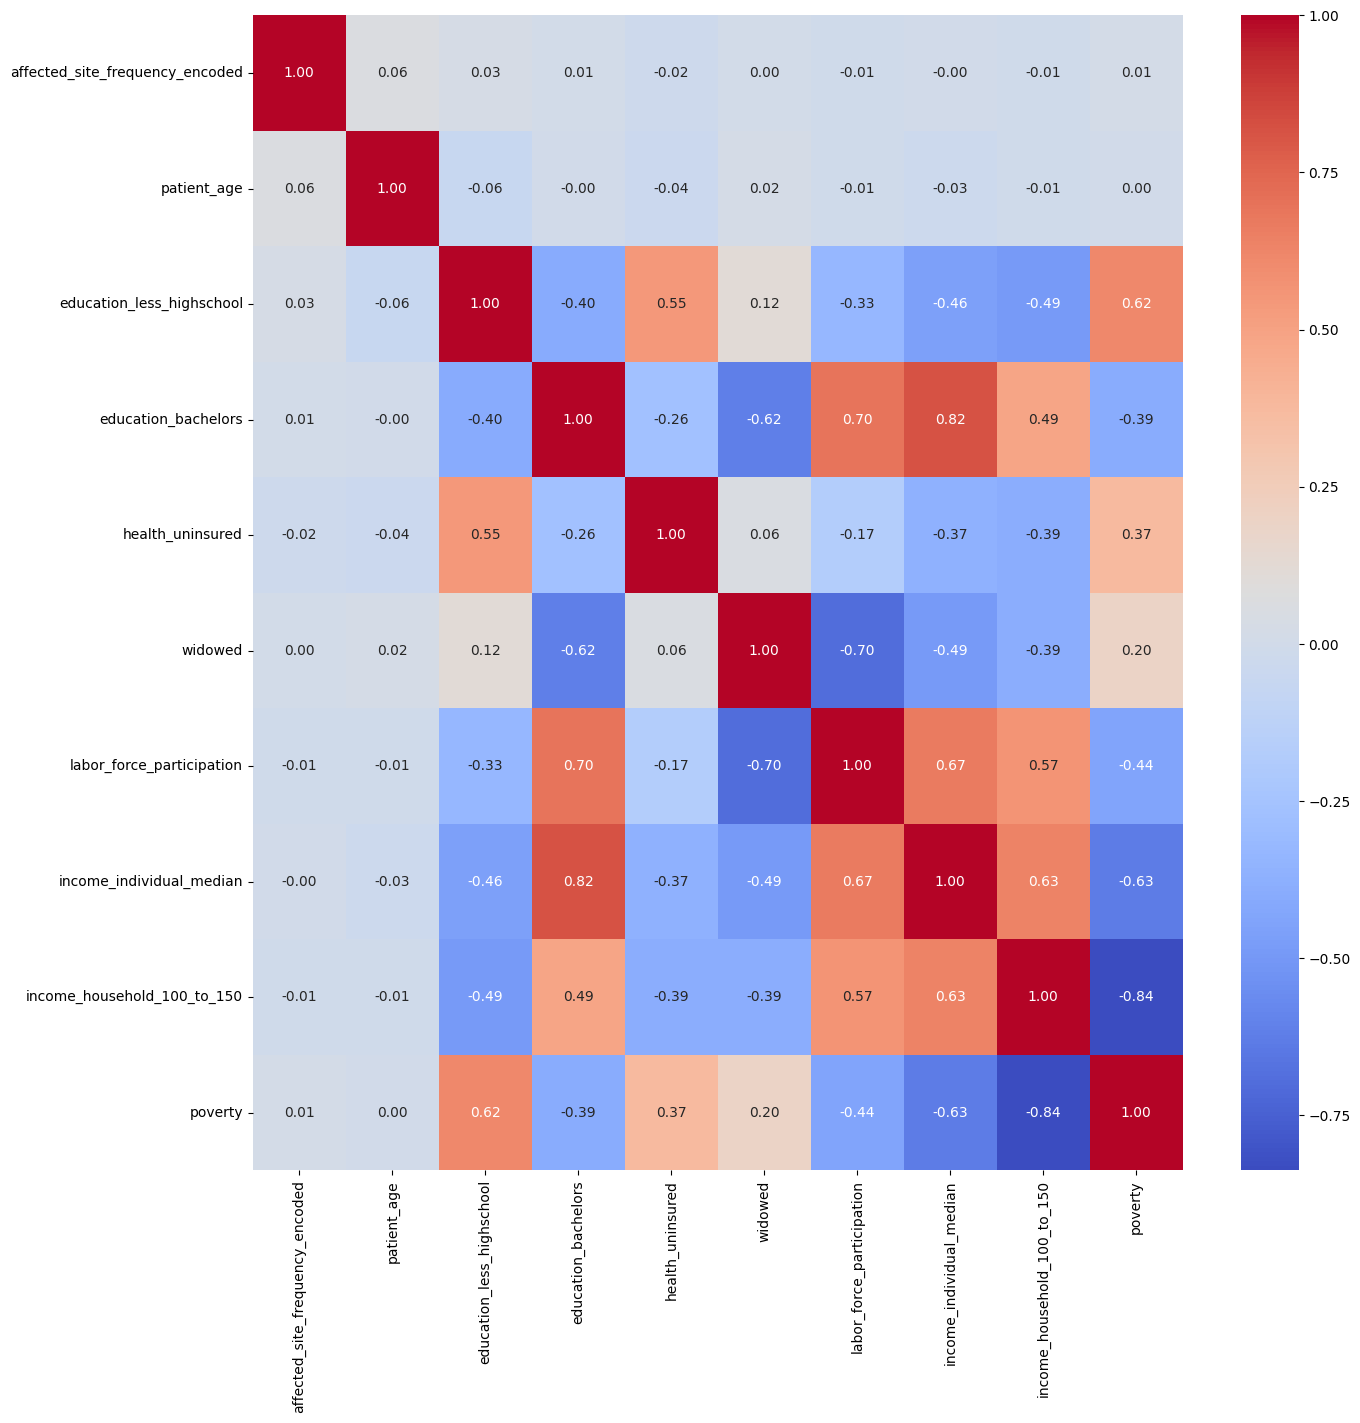

1
Top Col:  Index(['affected_site_frequency_encoded', 'patient_age',
       'education_less_highschool', 'education_bachelors', 'health_uninsured',
       'widowed', 'labor_force_participation', 'income_individual_median',
       'income_household_100_to_150', 'poverty'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

# Load the Data
df = pd.read_csv('cleaned_dataset_encoded.csv')

correlation_matrix = df.corr()

# Get the top 10 columns with the highest absolute correlation with 'bmi'
top_columns = correlation_matrix['DiagPeriodL90D'].abs().sort_values(ascending=False).head(11).index[1:]

# Plot the heatmap for the top 10 columns
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix[top_columns].loc[top_columns], annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

print(df['DiagPeriodL90D'].isnull().sum())

print("Top Col: ", top_columns)

